# Bioinformatics Assignment 1

### Phylogenetic Tree Construction by Sequence-Based Distance

In this Jupyter NoteBook, required function definitions are provided to you. You are free to add different functions but I will be using these methods to test your code. 

#### Reading file

In [1]:
import json
from pprint import pprint

1. Read "organisms.txt" file into "organisms" dictionary whose keys are the GenBank IDs and the values are the list of names and the protein sequences of *COX3* gene of the corresponding organism.

> 'NC_012920.1': ['Human', 'MTHQSHAYHMVKPSPWPLTGALSALLMTSGLAMWFHFHSMTLLMLGLLTNTLTMYQWWRD
VTRESTYQGHHTPPVQKGLRYGMILFITSEVFFFAGFFWAFYHSSLAPTPQLGGHWPPTGITPLNPLEVPLLNTSVLLASGVSITW
AHHSLMENNRNQMIQALLITILLGLYFTLLQASEYFESPFTISDGIYGSTFFVATGFHGLHVIIGSTFLTICFIRQLMFHFTSKHH
FGFEAAAWYWHFVDVVWLFLYVSIYWWGS']

In [2]:
# Read organisms.txt to dictionary.
with open('organisms.txt') as f:
    organisms = json.loads(f.read().replace("'","\""))

organisms

{'NC_012920.1': ['Human',
  'MTHQSHAYHMVKPSPWPLTGALSALLMTSGLAMWFHFHSMTLLMLGLLTNTLTMYQWWRDVTRESTYQGHHTPPVQKGLRYGMILFITSEVFFFAGFFWAFYHSSLAPTPQLGGHWPPTGITPLNPLEVPLLNTSVLLASGVSITWAHHSLMENNRNQMIQALLITILLGLYFTLLQASEYFESPFTISDGIYGSTFFVATGFHGLHVIIGSTFLTICFIRQLMFHFTSKHHFGFEAAAWYWHFVDVVWLFLYVSIYWWGS'],
 'NC_001700.1': ['Cat',
  'MTHQTHAYHMVNPSPWPLTGALSALLMTSGLAMWFHYNLTLLLTLGMTTNLLTMYQWWRDIIRESTFQGHHTPIVQKGLRYGMILFIISEVFFFAGFFWAFYHSSLAPTPELGGCWPPTGIIPLNPLEVPLLNTSVLLASGVSITWAHHSLMEGNRKHMLQALFITISLGVYFTLLQASEYYETSFTISDGVYGSTFFMATGFHGLHVIIGSTFLIVCFLRQLKYHFTSNHHFGFEAAAWYWHFVDVVWLFLYVSIYWWGS'],
 'KT901460.1': ['Dog',
  'MTHQTHAYHMVNPSPWPLTGALSALLMTSGLIMWFHYNSMSLLTLGLTTNLLTMYQWWRDVIREGTFQGHHTPIVQKGLRYGMVLFIVSEVFFFAGFFWAFYHSSLAPTPELGGCWPPTGIIPLNPLEVPLLNTSVLLASGVSITWAHHSLMEGNRKHMLQALFITISLGVYFTLLQASEYYETSFTISDGVYGSTFFMATGFHGLHVIIGSTFLIVCFLRQLHYHFTSNHHFGFEAAAWYWHFVDVVWLFLYVSIYWWGS'],
 'DQ874614.2': ['House mouse',
  'MTHQTHAYHMVNPSPWPLTGAFSALLLTSGLVMWFHYNSITLLTLGLLTNILTMYQWWRDVIREGTYQGHHTPIVQKGLRYGMILFIVS

In [3]:
with open('blosum62_ncbi.txt') as f:
    data = f.read().splitlines()

BLOSUM = {}
all_chars = data[0].split()

for char in all_chars:
    BLOSUM[char] = {}

for line in data[1:]:
    nums = line.split()[1:]
    temp_dict = {}
    
    for num, char in zip(nums, all_chars):
        temp_dict[char] = int(num)
        
    BLOSUM[line.split()[0]] = temp_dict
    
BLOSUM

{'A': {'A': 4,
  'R': -1,
  'N': -2,
  'D': -2,
  'C': 0,
  'Q': -1,
  'E': -1,
  'G': 0,
  'H': -2,
  'I': -1,
  'L': -1,
  'K': -1,
  'M': -1,
  'F': -2,
  'P': -1,
  'S': 1,
  'T': 0,
  'W': -3,
  'Y': -2,
  'V': 0,
  'B': -2,
  'Z': -1,
  'X': 0,
  '*': -4},
 'R': {'A': -1,
  'R': 5,
  'N': 0,
  'D': -2,
  'C': -3,
  'Q': 1,
  'E': 0,
  'G': -2,
  'H': 0,
  'I': -3,
  'L': -2,
  'K': 2,
  'M': -1,
  'F': -3,
  'P': -2,
  'S': -1,
  'T': -1,
  'W': -3,
  'Y': -2,
  'V': -3,
  'B': -1,
  'Z': 0,
  'X': -1,
  '*': -4},
 'N': {'A': -2,
  'R': 0,
  'N': 6,
  'D': 1,
  'C': -3,
  'Q': 0,
  'E': 0,
  'G': 0,
  'H': 1,
  'I': -3,
  'L': -3,
  'K': 0,
  'M': -2,
  'F': -3,
  'P': -2,
  'S': 1,
  'T': 0,
  'W': -4,
  'Y': -2,
  'V': -3,
  'B': 3,
  'Z': 0,
  'X': -1,
  '*': -4},
 'D': {'A': -2,
  'R': -2,
  'N': 1,
  'D': 6,
  'C': -3,
  'Q': 0,
  'E': 2,
  'G': -1,
  'H': -1,
  'I': -3,
  'L': -4,
  'K': -1,
  'M': -3,
  'F': -3,
  'P': -1,
  'S': 0,
  'T': -1,
  'W': -4,
  'Y': -3,
  'V': 

#### Algorithm implementation

2. Implement Needleman Wunsch algorithm using the [BLOSUM62](!https://www.ncbi.nlm.nih.gov/Class/FieldGuide/BLOSUM62.txt) substitution matrix.

In [34]:
def needleman_wunsch(seq1, seq2):
    '''
    Up is -1, Left is 1, Down is 0, Final is 2
    These numbers are used in the back tracking 
    
    '''
    seq1, seq2 = '*'+seq1, '*'+seq2

    alignment_matrix = [[None for i in seq2] for j in seq1]
    way_matrix = [[None for i in seq2] for j in seq1]
    
    alignment_matrix[0][0] = BLOSUM['*']['*']
    way_matrix[0][0] = 2
    
    # fill the first column
    for i in range(1, len(alignment_matrix)):
        alignment_matrix[i][0] = alignment_matrix[i-1][0] + BLOSUM[seq1[i]]['*']
        way_matrix[i][0] = -1
    
    # fill the first row
    for j in range(1, len(alignment_matrix[0])):
        alignment_matrix[0][j] = alignment_matrix[0][j-1] + BLOSUM[seq2[j]]['*']
        way_matrix[0][j] = 1
        
    for i in range(1, len(alignment_matrix)):
        for j in range(1, len(alignment_matrix[0])):
            upper_score = alignment_matrix[i-1][j] + BLOSUM[seq1[i]]['*']
            left_score = alignment_matrix[i][j-1] + BLOSUM[seq2[j]]['*']
            diag_score = alignment_matrix[i-1][j-1] + BLOSUM[seq1[i]][seq2[j]]
            cell_score = max(upper_score, left_score, diag_score)
            if upper_score == cell_score:
                way_matrix[i][j] = -1
            elif left_score == cell_score:
                way_matrix[i][j] = 1
            elif diag_score == cell_score:
                way_matrix[i][j] = 0
            alignment_matrix[i][j] = cell_score

    best_alignment_needleman_wunsch = construct_alingments(way_matrix, alignment_matrix, seq1, seq2)
    best_alignment_score_needleman_wunsch = alignment_matrix[len(alignment_matrix)-1][len(alignment_matrix[0])-1]

    # Find the alignment with the best score.
    return best_alignment_score_needleman_wunsch, best_alignment_needleman_wunsch

def construct_alingments(way_matrix, alignment_matrix, original_seq1, original_seq2):
    # 'U' is -1, 'L' is 1, 'D' is 0
    new_seq1, new_seq2 = '', ''
    
    i = len(original_seq1)-1
    j = len(original_seq2)-1
    while not (i == 0 and j == 0):
        if way_matrix[i][j] == 0:
            new_seq1 += original_seq1[i]
            new_seq2 += original_seq2[j]
            i -= 1
            j -= 1
        elif way_matrix[i][j] == 1:
            new_seq1 += '*'
            new_seq2 += original_seq2[j]
            j -= 1
        elif way_matrix[i][j] == -1:
            new_seq1 += original_seq1[i]
            new_seq2 += '*'
            i -= 1
    
    return new_seq1, new_seq2

seq1 = organisms['EF153719.1'][1] # Turkey organism
seq2 = organisms['KM096864.1'][1] # Chicken organism

#seq1 = seq1[:10]
#print(seq1)
#seq2 = seq2[:10]
#print(seq2)

# Functions tests
best_alignment_score_needleman_wunsch, best_alignment_needleman_wunsch = needleman_wunsch(seq1, seq2)
print(best_alignment_score_needleman_wunsch)
print(best_alignment_needleman_wunsch)

1358
('CSGWWYMSMYLFLWVIDVFHWYWAAAEFGFHHNSTFHFKILRLLCVTLFSSGIIVHLGHFGTAVFFTSGYISDAISFSTEHYEMAQLATFYLGLAITLTLAHIAQKRNGETISHHAWTVTVGSALLIATNLLPVDLPNLPNIGTPPWQGGLEPTPALSSHFFAWFFGLFFFVESTIFLIMGYRLGKQVTPTHHGQFTSERIVDRWWQLMVLLMSLLGAMLLTSTNYHFWMILGSTTLLAAAAGFIPWPSPDVMHYSHAQHAM', '*SGWWYMSMYLFLWIIDVFHWYWAAAEFGFHHNPTFHFKILRLLCVTLFSSGIIVHLGHFGTAVFFTSGYVSDAISFSAEHYEMAQLATFYFGLLITLTLAHIAQKRNGETISHHAWTVTVGSALLIATNLLPVELPNLPKVGTPPWQGGLEPTPALSSHFFAWFFGLFFFAESTIFLIMGYRLGKQVTPTHHGQFTSERVVDRWWQLMVLLMSLLGMTLLTTSSYHFWMILGSTTLLAAAAGFIPWPSPDVMHYSHAQHAM')


3. Implement Smith Waterman algorithm using the [BLOSUM62](!https://www.ncbi.nlm.nih.gov/Class/FieldGuide/BLOSUM62.txt) substitution matrix.

In [33]:
def smith_waterman(seq1, seq2):
    # Find the alignment with the best score.
    # 'U' is -1, 'L' is 1, 'D' is 0, 'F' is 2
    seq1, seq2 = '*'+seq1, '*'+seq2
    
    alignment_matrix = [[None for i in seq2] for j in seq1]
    way_matrix = [[None for i in seq2] for j in seq1]

    alignment_matrix[0][0] = 0 # BLOSUM['*']['*']
    way_matrix[0][0] = 2

    # fill the first column
    for i in range(1, len(alignment_matrix)):
        alignment_matrix[i][0] = 0
        way_matrix[i][0] = 2

    # fill the first row
    for j in range(1, len(alignment_matrix[0])):
        alignment_matrix[0][j] = 0
        way_matrix[0][j] = 2

    for i in range(1, len(alignment_matrix)):
        for j in range(1, len(alignment_matrix[0])):
            upper_score = alignment_matrix[i-1][j] + BLOSUM[seq1[i]]['*']
            left_score = alignment_matrix[i][j-1] + BLOSUM[seq2[j]]['*']
            diag_score = alignment_matrix[i-1][j-1] + BLOSUM[seq1[i]][seq2[j]]
            cell_score = max(upper_score, left_score, diag_score, 0)
            if upper_score == cell_score:
                way_matrix[i][j] = -1
            elif left_score == cell_score:
                way_matrix[i][j] = 1
            elif diag_score == cell_score:
                way_matrix[i][j] = 0
            elif 0 == cell_score:
                way_matrix[i][j] = 2
                
            alignment_matrix[i][j] = cell_score

    #pprint(alignment_matrix)
    #pprint(way_matrix)
    
    best_alignment_smith_waterman = get_alignments(way_matrix, alignment_matrix, seq1, seq2)
    best_alignment_score_smith_waterman = max(map(lambda x: max(x), alignment_matrix))
    
    return best_alignment_score_smith_waterman, best_alignment_smith_waterman

def my_argmax_2d(alignment_matrix):
    return max(map(lambda x: max(x), [[(elem, row_idx, idx) for elem, idx in zip(row,range(len(row)))] for row, row_idx in zip(alignment_matrix, range(len(alignment_matrix)))]))

def get_alignments(way_matrix, alignment_matrix, original_seq1, original_seq2):
    new_seq1, new_seq2 = '', ''
    
    max_elem = my_argmax_2d(alignment_matrix)
    #print(max_elem)
    
    i, j = max_elem[1], max_elem[2]
    while alignment_matrix[i][j] != 0:
        if way_matrix[i][j] == 0:
            new_seq1 += original_seq1[i]
            new_seq2 += original_seq2[j]
            i -= 1
            j -= 1
        elif way_matrix[i][j] == 1:
            new_seq1 += '*'
            new_seq2 += original_seq2[j]
            j -= 1
        elif way_matrix[i][j] == -1:
            new_seq1 += original_seq1[i]
            new_seq2 += '*'
            i -= 1
    
    return new_seq1, new_seq2

seq1 = organisms['EF153719.1'][1] # Turkey organism
seq2 = organisms['KM096864.1'][1] # Chicken organism

#seq1 = seq1[:10]
#print(seq1)
#seq2 = seq2[:10]
#print(seq2)

# Functions tests
best_alignment_score_smith_waterman, best_alignment_smith_waterman = smith_waterman(seq1, seq2)
print(best_alignment_score_smith_waterman)
print(best_alignment_smith_waterman)

1361
('SGWWYMSMYLFLWVIDVFHWYWAAAEFGFHHNSTFHFKILRLLCVTLFSSGIIVHLGHFGTAVFFTSGYISDAISFSTEHYEMAQLATFYLGLAITLTLAHIAQKRNGETISHHAWTVTVGSALLIATNLLPVDLPNLPNIGTPPWQGGLEPTPALSSHFFAWFFGLFFFVESTIFLIMGYRLGKQVTPTHHGQFTSERIVDRWWQLMVLLMSLLGAMLLTSTNYHFWMILGSTTLLAAAAGFIPWPSPDVMHYSHAQHAM', 'SGWWYMSMYLFLWIIDVFHWYWAAAEFGFHHNPTFHFKILRLLCVTLFSSGIIVHLGHFGTAVFFTSGYVSDAISFSAEHYEMAQLATFYFGLLITLTLAHIAQKRNGETISHHAWTVTVGSALLIATNLLPVELPNLPKVGTPPWQGGLEPTPALSSHFFAWFFGLFFFAESTIFLIMGYRLGKQVTPTHHGQFTSERVVDRWWQLMVLLMSLLGMTLLTTSSYHFWMILGSTTLLAAAAGFIPWPSPDVMHYSHAQHAM')


#### Calculate Score Matrix

4. Using Needleman Wunsch and Smith Waterman algorithms you will find the **scores**, i.e. similarities between any two sequences. Now, crete an NxN score matrix where N is the length of organisms dictionary and calculate the scores of each organism pairs.

In [52]:
# Calculate the score matrices for organism pairs using needleman_wunsch and smith_waterman algorithms.
def calculate_score_matrix(organisms, algorithm):
    # Calculate score matrix using smith_waterman() or needleman_wunsch()
    all_seqs = [elem[1] for elem in list(organisms.values())]
    
    score_matrix = [[None for i in all_seqs] for j in all_seqs]
    
    for idx1, seq1 in enumerate(all_seqs):
        for idx2, seq2 in enumerate(all_seqs):
            if algorithm == 'NW':
                score_matrix[idx1][idx2] = needleman_wunsch(seq1, seq2)[0]
            else:
                score_matrix[idx1][idx2] = smith_waterman(seq1, seq2)[0]
                
    return score_matrix

algorithm = 'NW'
score_matrix = calculate_score_matrix(organisms, algorithm)
score_matrix

[[1435,
  1266,
  1267,
  1265,
  1260,
  1239,
  1239,
  1153,
  1147,
  1150,
  1207,
  1208,
  1232,
  1270,
  1266],
 [1266,
  1435,
  1396,
  1309,
  1342,
  1264,
  1285,
  1164,
  1156,
  1142,
  1219,
  1216,
  1186,
  1323,
  1360],
 [1267,
  1396,
  1439,
  1322,
  1337,
  1269,
  1297,
  1163,
  1156,
  1141,
  1215,
  1220,
  1199,
  1317,
  1338],
 [1265,
  1309,
  1322,
  1434,
  1277,
  1223,
  1268,
  1147,
  1142,
  1102,
  1188,
  1174,
  1170,
  1276,
  1283],
 [1260,
  1342,
  1337,
  1277,
  1436,
  1246,
  1274,
  1151,
  1136,
  1138,
  1202,
  1213,
  1184,
  1334,
  1350],
 [1239,
  1264,
  1269,
  1223,
  1246,
  1428,
  1214,
  1132,
  1140,
  1141,
  1188,
  1186,
  1190,
  1258,
  1264],
 [1239,
  1285,
  1297,
  1268,
  1274,
  1214,
  1428,
  1174,
  1164,
  1132,
  1207,
  1223,
  1214,
  1282,
  1291],
 [1153,
  1164,
  1163,
  1147,
  1151,
  1132,
  1174,
  1431,
  1358,
  1116,
  1204,
  1189,
  1185,
  1158,
  1161],
 [1147,
  1156,
  1156,
  1142,


#### Calculate Distance Matrix

5. Now, you will use the score matrices to calculate **distances** between organism pairs. To do that;
    1. Find the maximum values of the score matrices.
    2. Subtract the each element of these matrices from the corresponding maximum values.
    3. Store resulting NxN matrices.

In [87]:
# Calculate the distances between organism pairs.
def calculate_distance_matrix(score_matrix, organisms, algorithm):
    # Calculate distance matrix of smith waterman score matrix or needleman wunsch score matrix

    maxs = list(map(lambda x: sorted(x, reverse=True)[1], score_matrix))
    
    for i, row in enumerate(score_matrix):
        for j, elem in enumerate(row):
            if i == j:
                score_matrix[i][j] = 0
            else:
                score_matrix[i][j] -= maxs[i]
    
    distance_matrix = score_matrix
    
    return distance_matrix

distance_matrix = calculate_distance_matrix(score_matrix, organisms, algorithm)
distance_matrix

[[0, -4, -3, -5, -10, -31, -31, -117, -123, -120, -63, -62, -38, 0, -4],
 [-130,
  0,
  0,
  -87,
  -54,
  -132,
  -111,
  -232,
  -240,
  -254,
  -177,
  -180,
  -210,
  -73,
  -36],
 [-129,
  0,
  0,
  -74,
  -59,
  -127,
  -99,
  -233,
  -240,
  -255,
  -181,
  -176,
  -197,
  -79,
  -58],
 [-57, -13, 0, 0, -45, -99, -54, -175, -180, -220, -134, -148, -152, -46, -39],
 [-90, -8, -13, -73, 0, -104, -76, -199, -214, -212, -148, -137, -166, -16, 0],
 [-30, -5, 0, -46, -23, 0, -55, -137, -129, -128, -81, -83, -79, -11, -5],
 [-58, -12, 0, -29, -23, -83, 0, -123, -133, -165, -90, -74, -83, -15, -6],
 [-205,
  -194,
  -195,
  -211,
  -207,
  -226,
  -184,
  0,
  0,
  -242,
  -154,
  -169,
  -173,
  -200,
  -197],
 [-211,
  -202,
  -202,
  -216,
  -222,
  -218,
  -194,
  0,
  0,
  -246,
  -137,
  -170,
  -169,
  -207,
  -203],
 [-98,
  -106,
  -107,
  -146,
  -110,
  -107,
  -116,
  -132,
  -136,
  0,
  -26,
  0,
  -32,
  -93,
  -94],
 [-118,
  -106,
  -110,
  -137,
  -123,
  -137,
  -118,

#### Generate Phylogenetic Tree

6. Finally, use below code to generate phylogenetic trees according to both Needleman Wunsch and Smith Waterman distance matrices.

In [88]:
from scipy.cluster.hierarchy import linkage, dendrogram
import pylab

def generate_phylogenetic_tree(organisms, distance_matrix, algorithm):    
    average = linkage(distance_matrix, "average")
    keys = [elem[0] for elem in organisms.values()]
    dendrogram(average, labels=keys, orientation="left", leaf_font_size=10)
    pylab.subplots_adjust(bottom=0.1, left=0.2, right=1.0, top=1.0)
    # Save figure as pylab.savefig("YourNameSurname" + algorithm +".jpg")
    # Show figure

#### Function Calls

In [89]:
algorithm = 'NW'
seq1 = organisms['EF153719.1'][1] # Turkey organism
seq2 = organisms['KM096864.1'][1] # Chicken organism

# Functions tests
best_alignment_score_needleman_wunsch, best_alignment_needleman_wunsch = needleman_wunsch(seq1, seq2)
best_alignment_score_smith_waterman, best_alignment_smith_waterman = smith_waterman(seq1, seq2)

# Phylogenetic tree test
score_matrix = calculate_score_matrix(organisms, algorithm)
distance_matrix = calculate_distance_matrix(score_matrix, organisms, algorithm)

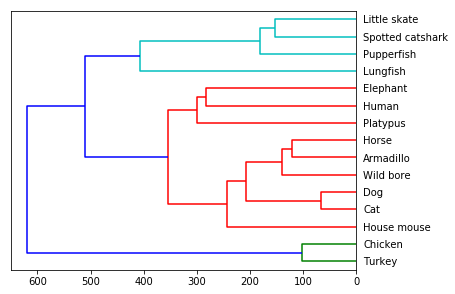

In [90]:
generate_phylogenetic_tree(organisms, distance_matrix, algorithm)

#### Comments

7. Comment on the results of two output images.

Notes: 
1. Your are not allowed to use Numpy.
2. You are not allowed to use any libraries to find the Needleman Wunsch and Smith Waterman scores.
3. You can only use standard libraries apart from the given codes.
4. Please submit your assignment using Moodle. Upload a single zip file named as YourNameSurname.zip. Your zip file should include your report, your source code, and the corresponding read.me file. You can use any programming language of your choice. But, your read.me file should clearly explain how to run your program.
5. For any question e-mail me from selen.parlar@boun.edu.tr